# IMPORT DATA

In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [132]:
df = pd.read_csv('data.csv')

In [133]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [135]:
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [136]:
print( df.shape )

(253680, 22)


In [137]:

# count_ones = df[(df['Diabetes_binary'] == 0) & (df['CholCheck'] == 0)].shape[0]
# print(count_ones)

# OUTLIERS DETECTION

<Axes: >

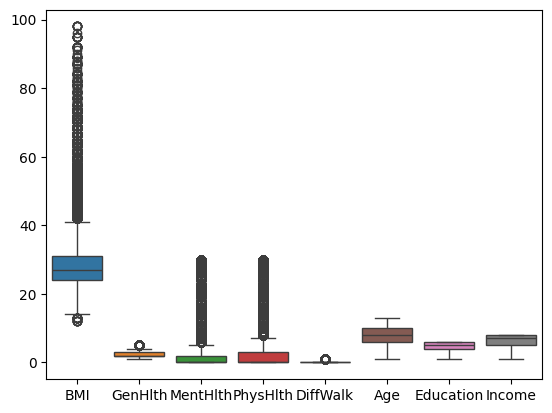

In [138]:
import pandas as pd
import seaborn as sns
import numpy as np

# Load the data
data = pd.read_csv("data.csv")

# Select numerical columns for analysis
numerical_cols = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income']

# Create boxplots for numerical variables
sns.boxplot(data=data[numerical_cols] )


In [139]:
# import numpy as np

def detect_outliers_zscore(data, threshold=3):

    mean = np.mean(data)
    std_dev = np.std(data)
    z_scores = [(x - mean) / std_dev for x in data]
    outlier_indices = np.where(np.abs(z_scores) > threshold)[0]
    return outlier_indices



# for col in df.columns:
#     # Example usage:
#     data = df[f'{col}'].to_list()
#     outliers_indices = detect_outliers_zscore(data)
#     df[f'{col}'] = df[f'{col}'].drop(outliers_indices)
#     print("Indices of outliers:", outliers_indices , len(outliers_indices) )
#     print("...")

for col in df.columns:
    # Example usage:
    data = df[col].to_list()
    outliers_indices = detect_outliers_zscore(data)
    df.reset_index(drop=True, inplace=True)  # Resetting index
    df = df.drop(outliers_indices)  # Dropping rows directly by index
    
# Move the print statement outside the loop if you want to print all outlier indices at once
print("Indices of outliers:", outliers_indices)
print("Total outliers:", len(outliers_indices))



Indices of outliers: [    72    163    166 ... 146709 146712 146721]
Total outliers: 2489


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144233 entries, 0 to 146720
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       144233 non-null  float64
 1   HighBP                144233 non-null  float64
 2   HighChol              144233 non-null  float64
 3   CholCheck             144233 non-null  float64
 4   BMI                   144233 non-null  float64
 5   Smoker                144233 non-null  float64
 6   Stroke                144233 non-null  float64
 7   HeartDiseaseorAttack  144233 non-null  float64
 8   PhysActivity          144233 non-null  float64
 9   Fruits                144233 non-null  float64
 10  Veggies               144233 non-null  float64
 11  HvyAlcoholConsump     144233 non-null  float64
 12  AnyHealthcare         144233 non-null  float64
 13  NoDocbcCost           144233 non-null  float64
 14  GenHlth               144233 non-null  float64
 15  MentH

In [141]:
df.dropna(inplace=True)

In [142]:
# # Calculate the min and max values of every column
# column_min_max = df.agg(['min', 'max'])

# column_min_max.to_csv('temo.csv' , index= False)

# print("Min and Max values of every column:")
# print(column_min_max)

In [143]:
for i in df.columns:
    print(df[f"{i}"].value_counts())

Diabetes_binary
0.0    130830
1.0     13403
Name: count, dtype: int64
HighBP
0.0    93136
1.0    51097
Name: count, dtype: int64
HighChol
0.0    89934
1.0    54299
Name: count, dtype: int64
CholCheck
1.0    144233
Name: count, dtype: int64
BMI
27.0    14928
26.0    12665
24.0    12343
25.0    10649
28.0     9782
23.0     9763
29.0     8649
22.0     8587
30.0     8294
31.0     6769
21.0     6146
32.0     5616
33.0     4769
20.0     3808
34.0     3691
35.0     2774
19.0     2330
36.0     2193
37.0     1926
38.0     1517
39.0     1273
40.0      986
18.0      963
41.0      700
42.0      662
43.0      585
44.0      383
17.0      361
45.0      274
46.0      269
47.0      220
48.0      145
16.0      136
15.0       55
14.0       15
13.0        5
12.0        2
Name: count, dtype: int64
Smoker
0.0    90516
1.0    53717
Name: count, dtype: int64
Stroke
0.0    144233
Name: count, dtype: int64
HeartDiseaseorAttack
0.0    144233
Name: count, dtype: int64
PhysActivity
1.0    119722
0.0     24511
Name

# FEATURE ENGINEERING

In [144]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load your dataset
data = df

# Separate features and target variable
x = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Ensure target variable contains non-negative values
# If it's a classification problem with binary classes, this step may not be necessary
if y.min() < 0:
    raise ValueError("Target variable contains negative values. Preprocessing required.")


# Feature Scaling with Min-Max Scaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform SelectKBest feature selection using chi2 (for classification)
k_best = SelectKBest(score_func=chi2, k=5)
X_train_kbest = k_best.fit_transform(X_train_scaled, y_train)
X_test_kbest = k_best.transform(X_test_scaled)

# Print the selected feature indices
print("Selected feature indices:", k_best.get_support(indices=True))

# Train a model with the selected features (e.g., Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_kbest, y_train)

# Evaluate model performance
accuracy = model.score(X_test_kbest, y_test)
print("Accuracy with selected features:", accuracy)


Selected feature indices: [ 0  1  3 13 18]
Accuracy with selected features: 0.9028321835892814


# DATA VISULIZATION AND DATA SELECTION

In [145]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,144233.000000,144233.000000,144233.000000,144233.0,144233.000000,144233.000000,144233.0,144233.0,144233.000000,144233.000000,...,144233.0,144233.0,144233.000000,144233.000000,144233.000000,144233.0,144233.000000,144233.000000,144233.000000,144233.000000
mean,0.092926,0.354267,0.376467,1.0,27.490519,0.372432,0.0,0.0,0.830060,0.664862,...,1.0,0.0,2.141868,1.188625,1.166592,0.0,0.447623,7.772833,5.256238,6.708999
std,0.290330,0.478292,0.484501,0.0,5.191911,0.483454,0.0,0.0,0.375582,0.472040,...,0.0,0.0,0.843801,3.169433,3.064035,0.0,0.497251,3.019624,0.854654,1.593444
min,0.000000,0.000000,0.000000,1.0,12.000000,0.000000,0.0,0.0,0.000000,0.000000,...,1.0,0.0,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,3.000000,2.000000
25%,0.000000,0.000000,0.000000,1.0,24.000000,0.000000,0.0,0.0,1.000000,0.000000,...,1.0,0.0,2.000000,0.000000,0.000000,0.0,0.000000,6.000000,5.000000,6.000000
50%,0.000000,0.000000,0.000000,1.0,27.000000,0.000000,0.0,0.0,1.000000,1.000000,...,1.0,0.0,2.000000,0.000000,0.000000,0.0,0.000000,8.000000,6.000000,7.000000
75%,0.000000,1.000000,1.000000,1.0,30.000000,1.000000,0.0,0.0,1.000000,1.000000,...,1.0,0.0,3.000000,0.000000,0.000000,0.0,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.0,48.000000,1.000000,0.0,0.0,1.000000,1.000000,...,1.0,0.0,5.000000,21.000000,24.000000,0.0,1.000000,13.000000,6.000000,8.000000


<Axes: >

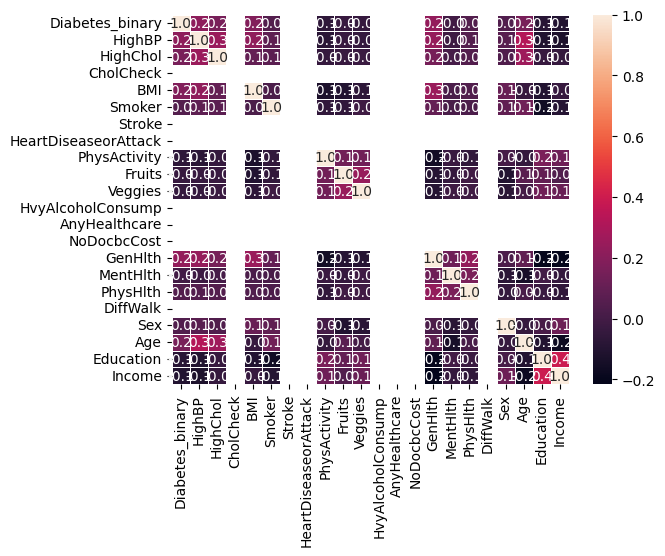

In [146]:
sns.heatmap(df.corr(),annot=True,fmt='0.1f',linewidth=.5)

C:\Users\heman\AppData\Local\Temp\ipykernel_18832\4020204213.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diabetes_binary',data=df,palette=['g','r'])


<Axes: xlabel='Diabetes_binary', ylabel='count'>

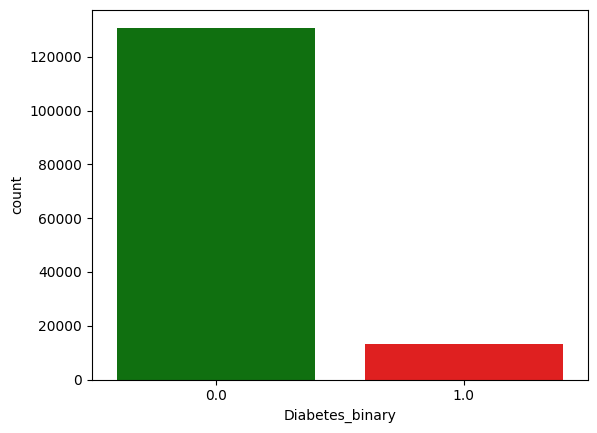

In [147]:
sns.countplot(x='Diabetes_binary',data=df,palette=['g','r'])

C:\Users\heman\AppData\Local\Temp\ipykernel_18832\3269337985.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Diabetes_binary"])


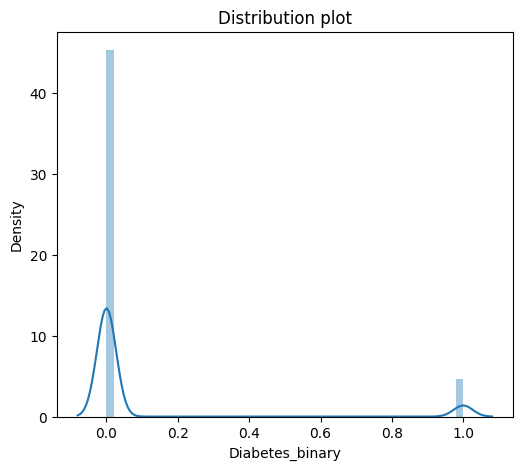

In [148]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,2)
plt.title('Distribution plot')
sns.distplot(df["Diabetes_binary"])

plt.show()

In [149]:
df.corr()
df.corr().to_csv('correlation.csv', index=False)


In [150]:
# PHYSICAL ACTIVITY ON OUTPUT

count_phys =0
count_nonphy=0

count_1 =0

print(df.shape)

row_count = df.shape[0]




count_ones = df[(df['Diabetes_binary'] == 0) & (df['PhysActivity'] == 0)].shape[0]
count_nonphy = count_phys + count_ones
print(count_ones/row_count)
count_ones = df[(df['Diabetes_binary'] == 0) & (df['PhysActivity'] == 1)].shape[0]
count_phys = count_phys + count_ones
print(count_ones/row_count)


count_ones = df[(df['Diabetes_binary'] == 1) & (df['PhysActivity'] == 1)].shape[0]
count_phys = count_phys + count_ones
print(count_ones/row_count)


print( "physics with diabates" , count_ones/count_phys   )


count_ones = df[(df['Diabetes_binary'] == 1) & (df['PhysActivity'] == 0)].shape[0]
count_nonphy = count_phys + count_ones
print(count_ones/row_count)

print( "non-physics with diabates" ,  count_ones/count_nonphy  )



(144233, 22)
0.14719239009103327
0.7598815804982216
0.07017811457849452
physics with diabates 0.08454586458629157
0.022747914832250596
non-physics with diabates 0.026674146159036773


In [151]:
# PHYSICAL ACTIVITY ON OUTPUT

print(df.shape)

row_count = df.shape[0]

count_ones = df[(df['Diabetes_binary'] == 1) & (df['GenHlth'] == 1)].shape[0]
print(count_ones/row_count)
count_ones = df[(df['Diabetes_binary'] == 1) & (df['GenHlth'] == 2)].shape[0]
print(count_ones/row_count)
count_ones = df[(df['Diabetes_binary'] == 1) & (df['GenHlth'] == 3)].shape[0]
print(count_ones/row_count)
count_ones = df[(df['Diabetes_binary'] == 1) & (df['GenHlth'] == 4)].shape[0]
print(count_ones/row_count)
count_ones = df[(df['Diabetes_binary'] == 1) & (df['GenHlth'] == 5)].shape[0]
print(count_ones/row_count)

print(".....")

count_ones = df[(df['Diabetes_binary'] == 0) & (df['GenHlth'] == 1)].shape[0]
print(count_ones/row_count)
count_ones = df[(df['Diabetes_binary'] == 0) & (df['GenHlth'] == 2)].shape[0]
print(count_ones/row_count)
count_ones = df[(df['Diabetes_binary'] == 0) & (df['GenHlth'] == 3)].shape[0]
print(count_ones/row_count)
count_ones = df[(df['Diabetes_binary'] == 0) & (df['GenHlth'] == 4)].shape[0]
print(count_ones/row_count)
count_ones = df[(df['Diabetes_binary'] == 0) & (df['GenHlth'] == 5)].shape[0]
print(count_ones/row_count)



(144233, 22)
0.004894857626202048
0.028467826364285565
0.04492730512434741
0.013602989607094077
0.001033050688816013
.....
0.233025729202055
0.4077915594905466
0.2301623068229878
0.03388960917404477
0.0022047658996207525


# LOGESTIC REGRESSION

In [152]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [153]:
x = df.drop('Diabetes_binary' , axis=1)
y = df['Diabetes_binary']

In [154]:
# splitting of data

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1)

In [155]:

# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardizing the features (optional but recommended for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating a logistic regression model
logreg = LogisticRegression()

# Training the model on the training data
logreg.fit(X_train, y_train)

# Making predictions on the test data
y_pred = logreg.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Getting additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9065760737685028

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     26180
         1.0       0.46      0.06      0.10      2667

    accuracy                           0.91     28847
   macro avg       0.68      0.52      0.53     28847
weighted avg       0.87      0.91      0.87     28847



# RANDOM FOREST REGRESSION

In [156]:
from sklearn.ensemble import RandomForestClassifier

In [157]:
# Creating a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Training the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Getting additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9002669255035186

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95     26180
         1.0       0.34      0.08      0.13      2667

    accuracy                           0.90     28847
   macro avg       0.62      0.53      0.54     28847
weighted avg       0.86      0.90      0.87     28847



# XG BOOST

In [158]:
import xgboost as xgb

In [159]:

# Creating a Gradient Boosting Machine classifier
gbm_classifier = xgb.XGBClassifier(random_state=42  )

# Training the classifier on the training data
gbm_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred = gbm_classifier.predict(X_test)

# Evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Getting additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9064720768190799

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     26180
         1.0       0.46      0.06      0.11      2667

    accuracy                           0.91     28847
   macro avg       0.68      0.53      0.53     28847
weighted avg       0.87      0.91      0.87     28847



In [160]:


# Save the trained model to a file
filename = 'xgb_trained_model.model'
gbm_classifier.save_model(filename)

c:\Users\heman\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [05:53:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


# LOGESTIC REGRESSION ( SELECTED ATTRIBUTES)

In [161]:
x = df[ ['HighBP' , 'HighChol', 'BMI' ,'GenHlth' , 'DiffWalk' , 'HeartDiseaseorAttack' , 'PhysHlth' , 'Age' , 'AnyHealthcare' ]  ]
y = df['Diabetes_binary']

In [162]:
# splitting of data

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1)

In [163]:

# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardizing the features (optional but recommended for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating a logistic regression model
logreg = LogisticRegression()

# Training the model on the training data
logreg.fit(X_train, y_train)

# Making predictions on the test data
y_pred = logreg.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Getting additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9067840676673484

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     26180
         1.0       0.46      0.05      0.09      2667

    accuracy                           0.91     28847
   macro avg       0.69      0.52      0.52     28847
weighted avg       0.87      0.91      0.87     28847



# XGBOOST (SELECTED ATTRIBUTES)

In [164]:

# Creating a Gradient Boosting Machine classifier
gbm_classifier = xgb.XGBClassifier(random_state=42)

# Training the classifier on the training data
gbm_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred = gbm_classifier.predict(X_test)

# Evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Getting additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9063334142198496

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     26180
         1.0       0.44      0.04      0.08      2667

    accuracy                           0.91     28847
   macro avg       0.67      0.52      0.52     28847
weighted avg       0.87      0.91      0.87     28847



# XGBOOST WITH FEATURE ENGENEERING

In [165]:
x = df.iloc[:, [ 1 ,13 ,15, 16]] 
y = df.iloc[:, [0]] 

In [166]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [167]:

# Creating a Gradient Boosting Machine classifier
gbm_classifier = xgb.XGBClassifier(random_state=42)

# Training the classifier on the training data
gbm_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred = gbm_classifier.predict(X_test)

# Evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Getting additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9068638779755026

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     39252
         1.0       0.23      0.00      0.00      4018

    accuracy                           0.91     43270
   macro avg       0.57      0.50      0.48     43270
weighted avg       0.84      0.91      0.86     43270

